## 埋め込みを使用した分類

テキストを分類する方法は多くあります。このノートブックでは、埋め込みを使用したテキスト分類の一例を共有します。多くのテキスト分類タスクにおいて、ファインチューニングされたモデルが埋め込みよりも優れていることがわかっています。ファインチューニングされたモデルによる分類の例は [Fine-tuned_classification.ipynb](Fine-tuned_classification.ipynb) で参照できます。また、埋め込み次元数よりも多くの例があることが推奨されていますが、本ノートブックではそれを十分に達成していません。

このテキスト分類タスクでは、レビューのテキストの埋め込みに基づいて食品のレビューのスコア（1から5）を予測します。以下のすべてのタスクでデータセットをトレーニングセットとテストセットに分割することで、未見のデータに対する性能を現実的に評価します。データセットは [Get_embeddings_from_dataset Notebook](Get_embeddings_from_dataset.ipynb) で作成されています。

              precision    recall  f1-score   support

           1       0.88      0.35      0.50        20
           2       1.00      0.38      0.55         8
           3       1.00      0.18      0.31        11
           4       1.00      0.26      0.41        27
           5       0.74      1.00      0.85       134

    accuracy                           0.77       200
   macro avg       0.92      0.43      0.52       200
weighted avg       0.82      0.77      0.72       200



<Axes: >

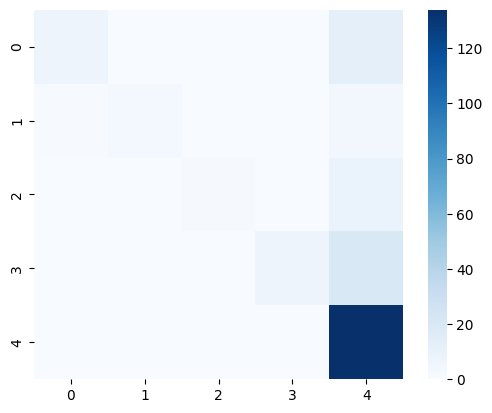

In [3]:
# imports
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# load data
datafile_path = "data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(literal_eval).apply(np.array)  # convert string to array

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    list(df.embedding.values), df.Score, test_size=0.2, random_state=42
)

# train random forest classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
probas = clf.predict_proba(X_test)

report = classification_report(y_test, preds)
print(report)

# 混合行列をヒートマップで表示

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, square=True, cbar=True,  fmt="d", cmap="Blues")

モデルは各カテゴリーをまあまあうまく区別できるように学習していることがわかります。5つ星のレビューが全体的に最も良いパフォーマンスを示していますが、これはあまり驚くべきことではありません。なぜなら、データセット内で最も一般的なカテゴリーだからです。

RandomForestClassifier() - Average precision score over all classes: 0.87


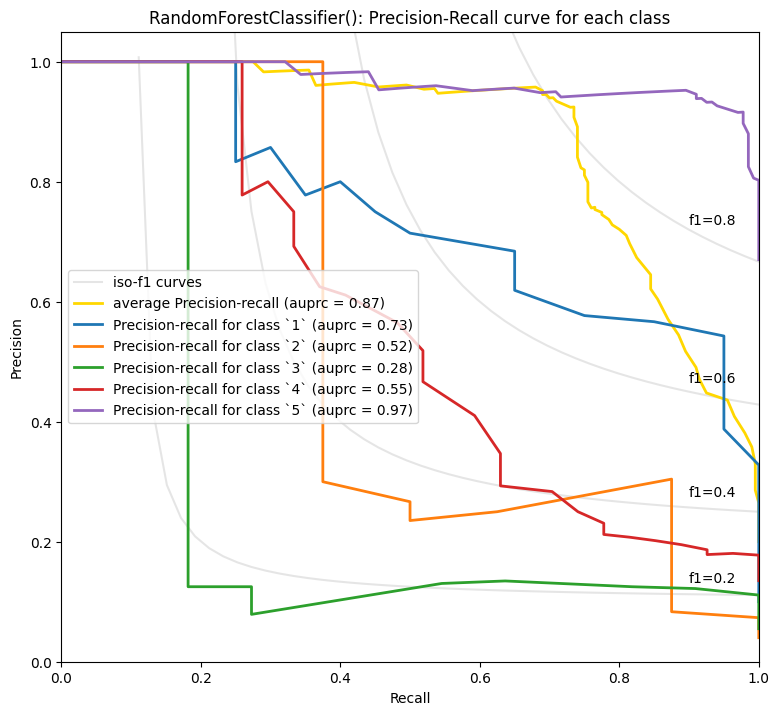

In [4]:
from openai.embeddings_utils import plot_multiclass_precision_recall

plot_multiclass_precision_recall(probas, y_test, [1, 2, 3, 4, 5], clf)


予想通り、5つ星と1つ星のレビューは予測しやすいようです。もっと多くのデータがあれば、2〜4つ星の間の微妙な違いをより正確に予測できるかもしれませんが、また、人々が中間の評価をどのように使うかにはおそらく主観性がより多く存在しています。